In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#pip install pandas matplotlib statsmodels
# Cargar los datos

In [2]:
url = "http://robjhyndman.com/tsdldata/data/nybirths.dat"
nacimientos = pd.read_table(url, header=None)


In [3]:
# Crear la serie temporal
nacimientos.index = pd.date_range(start="1946-01", periods=len(nacimientos), freq='M')
nacimientos.columns = ['Nacimientos']


C:\Users\BPCJR\AppData\Local\Temp\ipykernel_8496\414748594.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nacimientos.index = pd.date_range(start="1946-01", periods=len(nacimientos), freq='M')


In [4]:
# Ajuste del modelo Holt-Winters sin tendencia y sin componente estacional
modelo = ExponentialSmoothing(nacimientos['Nacimientos'], trend=None, seasonal=None, damped_trend=False)
ajuste = modelo.fit(smoothing_level=0.9418836, optimized=False)


In [5]:
# Predicciones
predicciones = ajuste.fittedvalues

# Mostrar el modelo ajustado
print("Parámetros de suavizado:")
print(f"Alpha: {ajuste.params['smoothing_level']}")

Parámetros de suavizado:
Alpha: 0.9418836


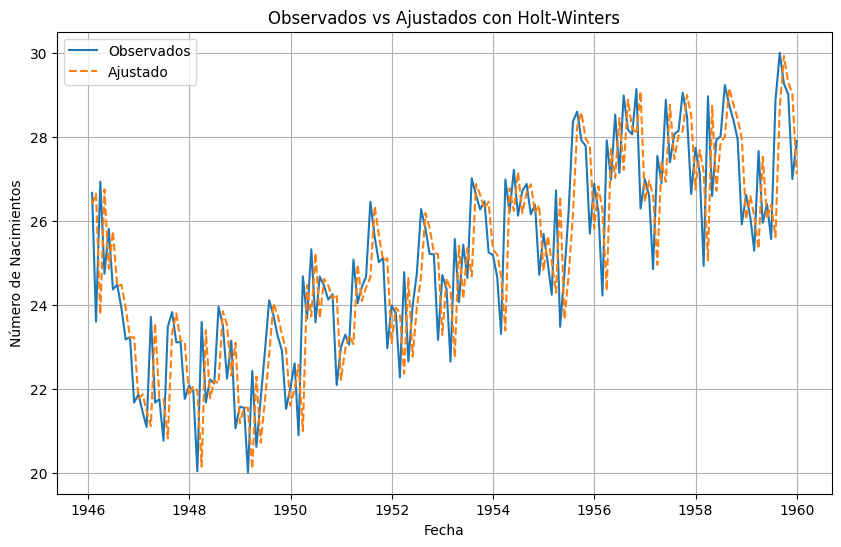

In [6]:
# Graficar las observaciones vs los valores ajustados
plt.figure(figsize=(10, 6))
plt.plot(nacimientos.index, nacimientos['Nacimientos'], label="Observados")
plt.plot(nacimientos.index, predicciones, label="Ajustado", linestyle="--")
plt.title("Observados vs Ajustados con Holt-Winters")
plt.xlabel("Fecha")
plt.ylabel("Número de Nacimientos")
plt.legend()
plt.grid(True)
plt.show()
